<a href="https://colab.research.google.com/github/kausik10/finite_element_method/blob/main/finite_element_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

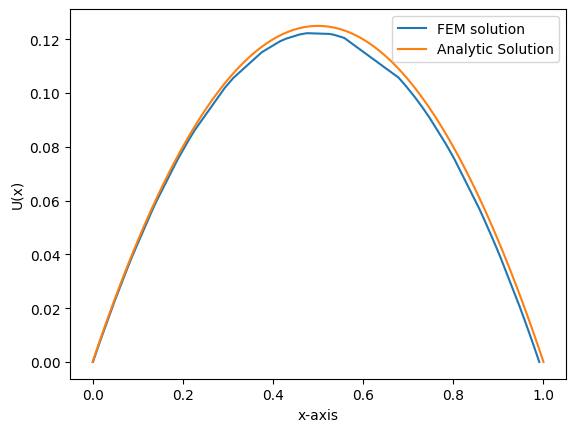

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
# Define the problem and grid
#number of intervals in the domain = 50, i.e. n=total number of x co-ordinates
n=50

#an empty array, this array will be populated by 50 different random values  a value for each node
x=[]

for i in range(n):
  x.append(random.random())

# the 50 different random values are sorted in ascending order
x=np.sort(x)

#define an elemental dx, (size of each element) which will be populated in the for loop below it,
dx=[]

#number of elements will be 1 less than number of nodes, therefore, it is populated upto n-1
for i in range(n-1):
  #i=0 initially, that means for i=0, i-1 would be -1, i.e. last element in matrix, which is not the required computational value.
  i=i+1
  dx.append(x[i]-x[i-1])

# K is a tridiagonal matrix of dimension n-2, i.e. 48x48
K=np.zeros((n-2,n-2))

'''
[[(1/dx0 + 1/dx1) -1/dx1                ]
 [-1/dx1 (1/dx1 + 1/dx2) -1/dx2         ]
 [         -1/dx2   .....               ]

this is the type of tridiagnoal matrix formed

so to accumulate such type of values, we incorporate three different for loops
'''
# for diagonal population
for i in range(n-2):
  K[i,i] = (1/dx[i])+(1/dx[i+1])

#for super diagonal population i.e. on the right of diagonal
for i in range(n-3):
  K[i,i+1] = (-1/dx[i+1])

#for sub-diagonal population, i.e just below the diagonal
for i in range(n-3):
  K[i+1,i] = (-1/dx[i+1])

#compute for nabla U = -F , this one's F
F=np.zeros(n-2)

#for 1D
'''
F = [[(dx0+dx1) / 2]
    [.............]
    [..............]]
'''
for i in range(n-2):
  F[i] = (dx[i]+dx[i+1])/2

# K U = F
# we have A (tridiagonal system) we have F , now we need to compute U, the solution function
#linalg.solve is used to solve the linear system using LU decomposition method

U=np.linalg.solve(K,F)

#applying boundary conditions, {using 0 for this case}
U_t=np.append(U,[0])
U_t=np.append([0], U_t)

#plotting the solution using pyplot library
plt.plot(x,U_t, label='FEM solution')

#this is the FEM solution

# analytical solution
'''
nabla squared U = f
put f = 1 (for easiness)
then solving for u gives
u(x) = -x2/2 + x/2
'''
xx=np.linspace(0,1,num=100)
U_a=[]

for i in range(len(xx)):
  U_a.append(-xx[i]**2/2+xx[i]/2)

#plotting the analytical solution
plt.plot(xx,U_a, label='Analytic Solution')

plt.xlabel('x-axis')
plt.ylabel('U(x)')

plt.legend()
plt.show()

In [10]:
import numpy as np
def tridiagonal_matrix(dx):
  n = len(dx)
  matrix = np.zeros((n, n))
  for i in range(n):
    matrix[i, i] = 1 / dx[i]
  for i in range(1, n):
    matrix[i, i - 1] = 1 / dx[i]
    matrix[i - 1, i] = -1 / dx[i]
  return matrix

dx_values = [1, 2, 3, 4] # Replace with your actual values
result_matrix = tridiagonal_matrix(dx_values)
print(result_matrix)

[[ 1.         -0.5         0.          0.        ]
 [ 0.5         0.5        -0.33333333  0.        ]
 [ 0.          0.33333333  0.33333333 -0.25      ]
 [ 0.          0.          0.25        0.25      ]]
